In [44]:
import numpy as np
import pandas as pd


from textblob import TextBlob

import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle

from textblob import TextBlob
#from gensim.models import word2vec
from sklearn.metrics import classification_report
from sklearn.ensemble import  RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.cluster import KMeans, AgglomerativeClustering
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
#nltk.download('popular', halt_on_error=False)

import string
from sklearn import metrics
#textblob
from textblob import TextBlob, Word

In [45]:
def read_file():
    """Reading File"""
    file_name = input("File should be in correct directory, \n Please specify file name ")
    data = pd.read_csv(file_name)
    return data

In [46]:
def parse(s):
    s = s.replace("cant",r"can't").replace("wheres",r"where's").replace(" i "," I ")
    return str(s[0].upper()) + s[1:]

def clean_text(texts):
    
    #cleaning text
    try:
        text=TextBlob(parse(texts))
        #spell = SpellChecker()
        words=text.words
        sw = stopwords.words('english')
        #[spell.correction(i)  if i.islower() else i for i in words]
        new = [i.lower() for i in words if i.lower()]
        cleaned=TextBlob(" ".join(new))
        a=[]
        ## here I will loop twice to lemmatize both verbs and nouns
        for i in cleaned.words:
            a.append(i.lemmatize())
        c=TextBlob(" ".join(a)).words
        return " ".join(c)
    except:
        print(len(texts))
        return texts


In [47]:
def load_tf_idf():
    "loading model for tf-id"
    pickled_model = pickle.load(open('vectorizer.pk', 'rb'))
    return pickled_model

def transform_data_td_idf(tf_model,data_for_tf):
    "transforming data to tf-ids"
    tf = tf_model.transform(data_for_tf['text_cleaned'].tolist())
    data_tf = pd.DataFrame(tf.toarray(),columns=tf_model.get_feature_names())
    return data_tf

    

In [48]:
def getSubjectivity(text):
    """getting Subjectivity"""
    return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
def getPolarity(text):
    """getting polarity"""
    return TextBlob(text).sentiment.polarity


def punkt_frew_norm(x):
    """distribution of punktuation"""
    try:
        count = 0
        leng = len(x)
        for i in x:
            if i in string.punctuation:
                count+=1
        return count/leng
    except:
        return 0

def upper_word_freq(x):
    """distribution of upper words"""
    try:
        count = 0
        leng = len(x)
        for i in x.split(" "):
            if i.isupper():
                count+=1
        return count/leng
    except:
        return 0



In [49]:
def add_features(data,data_tf):
    """adding features defined above"""
    data_tf['subjectivity'] = data['text'].apply(getSubjectivity)
    data_tf['polarity'] = data['text'].apply(getPolarity)
    data_tf['upper_word_dist'] = data['text'].apply(upper_word_freq)
    data_tf['punkt_frew']  = data['text'].apply(punkt_frew_norm)
    return data_tf

In [50]:
def load_model(filename):
    """loading model"""
    loaded_model = pickle.load(open(filename, 'rb'))
    return loaded_model

In [51]:
def model_prediction(data_tf,model):
    "making prediction"
    predicted = model.predict(data_tf)
    return predicted

In [52]:
def main():
    from sklearn.metrics import plot_confusion_matrix
    """all in all"""
    data = read_file()
    data['text_cleaned'] = data['text'].apply(clean_text)
    vectorizer = load_tf_idf()
    data_tf = transform_data_td_idf(vectorizer,data)
    data_tf = add_features(data,data_tf)
    model = load_model('forest.sav')
    predicted = model_prediction(data_tf,model)
    data['predicted'] = predicted
    data.to_csv("model_output_neutral.csv",index=False)
    try:
        print(classification_report(data['label'].to_numpy(),predicted))
    except:
        pass
    
    disp = plot_confusion_matrix(model, data_tf, data['label'],
                                 display_labels=data['label'].unique(),
                                 cmap=plt.cm.Blues)
    plt.xticks(rotation = 70)
    plt.show()

File should be in correct directory, 
 Please specify file name T1_test.csv
              precision    recall  f1-score   support

  admiration       0.68      0.83      0.75       350
   amusement       0.83      0.82      0.83       167
       anger       0.40      0.68      0.51        76
    approval       0.43      0.46      0.44       101
   curiosity       0.46      0.60      0.52       108
   gratitude       0.98      0.97      0.98       538
        love       0.84      0.90      0.87       196
     neutral       0.85      0.71      0.77      1121
    optimism       0.81      0.87      0.84        75
     sadness       0.74      0.84      0.79        68

    accuracy                           0.79      2800
   macro avg       0.70      0.77      0.73      2800
weighted avg       0.81      0.79      0.79      2800



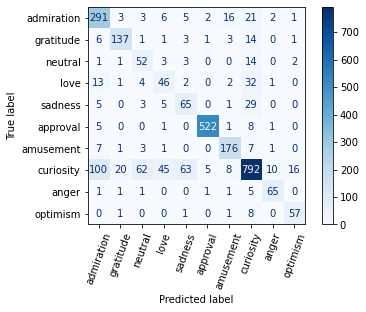

In [53]:
main()

In [26]:
pd.read_csv("model_output_neutral.csv")

,text,label,text_cleaned,predicted
0,Thank you all for the insight.,gratitude,thank you all for the insight,gratitude
1,I am already using ublock. Thank you for sugge...,gratitude,i am already using ublock thank you for sugges...,gratitude
2,That’s awesome!,admiration,that ’ s awesome,admiration
3,True :/,neutral,true,approval
4,Also likely selling stolen goods too lol,amusement,also likely selling stolen good too lol,amusement
...,...,...,...,...
6527,Knicks fans chanting lets go heat is sickening,neutral,knicks fan chanting let go heat is sickening,anger
6528,Goddam it!,anger,goddam it,neutral
6529,Those charts seem to indicate approximately a ...,neutral,those chart seem to indicate approximately a n...,neutral
6530,That'll cost ya.,neutral,that 'll cost ya,neutral
